# Latar Belakang

Sebuah supermarket ingin meningkatkan efektifitas pemasaran dan penjualan melalui media online maupun offline. Dengan beragamnya segmentasi pelanggan berdasarkan usia dan pendapatan, diperlukan pemahaman tentang bagaimana kampanye promosi diterima oleh berbagai segmen dan bagaimana karakteristik demografis memengaruhi preferensi pelanggan dalam berbelanja melalui toko fisik, situs web, atau katalog. Dengan data yang ada, perusahaan ingin mengetahui dan mengidentifikasi segmentasi pelanggan dan bagaimana mereka berbelanja di berbagai media pembelian. Pengetahuan ini diharapkan dapat membantu perusahaan dalam merancang kampanye yang lebih tepat sasaran dan mengoptimalkan strategi penjualan.


# Pernyataan Masalah

Perusahaan dari supermarket ingin mengetahui segmentasi pelanggan manakah yang paling banyak menerima kampanye. Hal ini dapat membantu perusahaan untuk mengeteahui manakah segmentasi pelanggan yang perlu ditingkatkan jumlah penerimaan kampanye promosi dan media manakah yang perlu ditingkatkan. Selain itu, perusahaan ingin memahami bagaimana perilaku dari pelanggan yang dipengaruhi oleh karakteristik demografi pelanggan.

1. Bagaimana segmentasi pelanggan memengaruhi penerimaan kampanye promosi?
2. Bagaimana karakteristik demografi memengaruhi perilaku pembelian di berbagai media pembelian atau perbelanjaan?

## Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


In [4]:
df = pd.read_excel('Supermarket-Customers.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data yang digunakan adalah data pelanggan supermarket sejak tahun 2012 hingga 2014 sebanyak 2240 data. Data ini terdiri atas 29 kolom yang dapat dibagi menjadi 4 kategori, yaitu: 
1. People
    - ID : Identitas unik dari pelanggan
    - Year_Birth : Tahun lahir pelanggan
    - Education : Tingkat pendidikan pelanggan
    - Marital_Status : Status perkawinan pelanggan
    - Income : Pendapatan rumah tangga tahunan pelanggan
    - Kidhome : Jumlah anak dalam rumah tangga pelanggan
    - Teenhome : Jumlah remaja dalam rumah tangga pelangan
    - Dt_Customer : Tanggal pendaftaran pelanggan
    - Recency : Jumlah hari sejak pembelian terakhir pelanggan
    - Complain : Apakah pelanggan pernah membuat keluhan, bernilai 1 jika pernah, 0 jika tidak pernah. 
2. Products 
    - MntWines : Jumlah yang dikeluarkan untuk wine dalam 2 tahun terakhir
    - MntFruits : Jumlah yang dikeluarkan untuk buah-buahan dalam 2 tahun terakhir
    - MntMeatProducts : Jumlah yang dikeluarkan untuk produk daging dalam 2 tahun terakhir
    - MntFishProducts : Jumlah yang dikeluarkan untuk produk ikan dalam 2 tahun terakhir
    - MntSweetProducts : Jumlah yang dikeluarkan untuk produk manis dalam 2 tahun terakhir
    - MntGoldProds : Jumlah yang dikeluarkan untuk emas dalam 2 tahun terakhir
3. Promotion 
    - NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
    - AcceptedCmp1 : Apakah pelanggan menerima tawaran pada kampanye pertama, bernilai 1 jika menerima, 0 jika tidak
    - AcceptedCmp2 : Apakah pelanggan menerima tawaran pada kampanye kedua, bernilai 1 jika menerima, 0 jika tidak
    - AcceptedCmp3 : Apakah pelanggan menerima tawaran pada kampanye ketiga, bernilai 1 jika menerima, 0 jika tidak
    - AcceptedCmp4 : Apakah pelanggan menerima tawaran pada kampanye keempat, bernilai 1 jika menerima, 0 jika tidak
    - AcceptedCmp5 : Apakah pelanggan menerima tawaran pada kampanye kelima, bernilai 1 jika menerima, 0 jika tidak
    - Response : Apakah pelanggan menerima tawaran pada kampanye terakhir, bernilai 1 jika menerima, 0 jika tidak
4. Place
    - NumWebPurchases : Jumlah pembelian yang dilakukan melalui website perusahaan
    - NumCatalogPurchases : Jumlah pembelian yang dilakukan melalui katalog
    - NumStorePurchases : Jumlah pembelian yang dilakukan  secara langsung di toko
    - NumWebVisitsMonth : Jumlah kunjungan website perusahaan bulan lalu

Untuk memudahkan analisis, daftar tipe data dari kolom dapat dilihat sebagai berikut: 

1. Numerical :   
    - Discrete : 
        Kidhome, Teenhome, Recency, MntFruit, MntMeat, MntFish, MntFish, MntSweet, MntGold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitMonths
    - Continue : 
        Year_Birth, Income, Age

2. Categorical : 
    - Ordinal : 
        Education
    - Nominal :
        Marital Status, Complaint, AcceptedCmp1, AcceptedCmp2, AcceptedCmpp3, AcceptedCmp4, AcceptedCmp5, Response

3. DateTime : 
    
    Dt_Customer

4. Unknown : 
        
    Z_Contact Cost, Z_Revenue

# Data Cleaning 

Kita dapat menghapus beberapa kolom karena tidak digunakan dalam analisis, yaitu kolom Z_CostContact dan Z_Revenue. 

In [6]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

Kemudian, kita perlu mengubah tipe data dari kolom Dt_Customer yang semula bertipe object menjadi tipe data datetime. 

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Untuk mempermudah segmentasi pelanggan berdasarkan umur, dibuat beberapa kolom baru, yaitu Age untuk menjelaskan umur dari pelanggan dan Age_Category untuk menjelaskan kategori umur dari pelanggan. Kategori umur yang dipakai adalah Child (5-11 Tahun), Teen (12-25 Tahun), Adult (26-45 Tahun), dan Elder (lebih dari 46 tahun). Pengkategorian ini berdasarkan kategori umur dari Kemenkes yang disederhanakan. Untuk kolom Age, didapatkan dari current_year - Year_Birth. Namun, karena tidak ada informasi mengenai kapan data dikumpulkan, maka dapat digunakan tahun pendaftaran pelanggan terakhir yang tercatat pada kolom Dt_Customer sebagai current_year, yaitu tahun 2014.  

In [8]:
current_year = 2014  
df['Age'] = current_year - df['Year_Birth']

# Membuat kategori umur
def categorize_age(age):
    if 5 <= age <= 11:
        return 'Child'
    elif 12 <= age <= 25:
        return 'Teen'
    elif 26 <= age <= 45:
        return 'Adult'
    elif age > 45:
        return 'Elder'
    else:
        return 'Undefined'

df['Age_Category'] = df['Age'].apply(categorize_age)

print(df[['Year_Birth', 'Age', 'Age_Category']])

      Year_Birth  Age Age_Category
0           1957   57        Elder
1           1954   60        Elder
2           1965   49        Elder
3           1984   30        Adult
4           1981   33        Adult
...          ...  ...          ...
2235        1967   47        Elder
2236        1946   68        Elder
2237        1981   33        Adult
2238        1956   58        Elder
2239        1954   60        Elder

[2240 rows x 3 columns]


Kemudian, dilakukan pengecekkan apakah terdapat data yang hilang pada data. 

In [9]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
Age                    0.000000
Age_Category           0.000000
dtype: float64

In [10]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Age_Category            0
dtype: int64

Berdasarkan hasil pengecekan data yang kosong atau missing value , dapat dilihat bahwa terdapat kolom yang memiliki data kosong atau missing value, yaitu pada kolom Income sebanyak 24 data atau 1.07%. Melihat persebaran data pada kolom 'Income', dapat dilihat bahwa data tidak terdistribusi normal. Oleh karenanya untuk mengatasi missing value pada kolom tersebut digunakan median untuk mengisi data yang kosong. 

In [11]:
median_income_by_category = df.groupby('Age_Category')['Income'].median()

def fill_income(row):
    if pd.isna(row['Income']):
        return median_income_by_category [row['Age_Category']]
    else:
        return row['Income']
    
df['Income'] = df.apply(fill_income, axis=1)

print(df[['Age_Category', 'Income']])

     Age_Category   Income
0           Elder  58138.0
1           Elder  46344.0
2           Elder  71613.0
3           Adult  26646.0
4           Adult  58293.0
...           ...      ...
2235        Elder  61223.0
2236        Elder  64014.0
2237        Adult  56981.0
2238        Elder  69245.0
2239        Elder  52869.0

[2240 rows x 2 columns]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Dapat dilihat bahwa sudah tidak ada data yang kosong atau missing value. Kemudian terdapat dua kolom baru, yaitu Age dan Age_Category. Berikutnya, dilakukan pengecekkan apakah terdapat data yang terduplikasi atau tidak. 

In [13]:
df[df.duplicated()]
df[df.duplicated()].shape[0]

0

Dapat dilihat bahwa tidak ada data yang terduplikasi. Berikutnya, dilakukan penanganan data outliers. Pada data, ditemukan outliers pada kolom Income dan Birth_Year. Karena jumlahnya tidak banyak, yaitu sebanyak 8 data pada kolom Income dan 3 data pada kolom Year_Birth, data tersebut dapat dihapus. 

<Axes: xlabel='Income'>

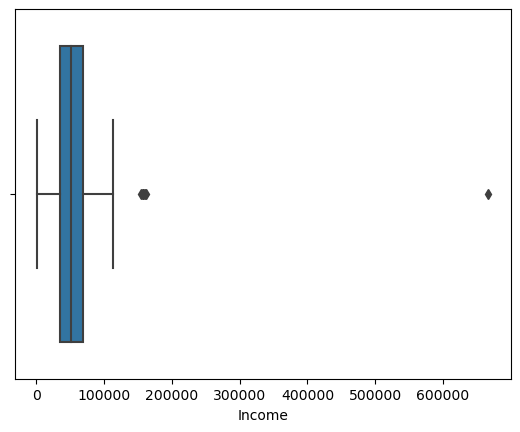

In [14]:
sns.boxplot(data=df, x='Income')

<Axes: xlabel='Year_Birth'>

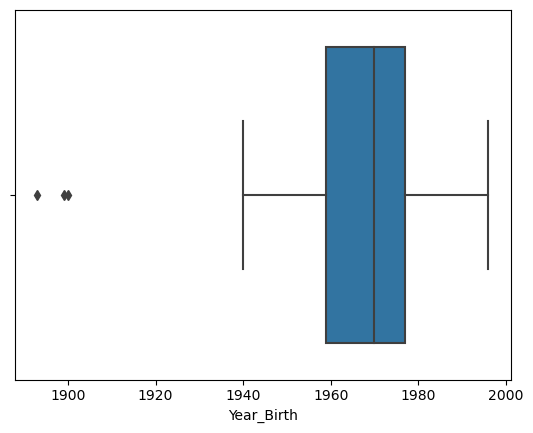

In [15]:
sns.boxplot(data=df, x='Year_Birth')

In [16]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]


In [17]:
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Year_Birth'] >= lower_bound) & (df['Year_Birth'] <= upper_bound)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2229 non-null   float64       
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntWines             2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-nul

Data yang semula berjumlah 2240, kini menjadi 2229 setelah dilakukan penghapusan sebanyak 11 data. Berikutnya, pada kolom Marital_Status, terdapat beberapa nilai yang tidak sesuai dan berbeda dari nilai yang ada, seperti YOLO, Absurd, Alone, dan Together. Nilai ini dapat direplace dan disesuaikan agar mempermudah proses analisis. Misal 'YOLO', 'Absurd', dan 'Alone' dapat diganti menjadi 'Single', dan 'Together' dapat diganti dengan 'Married'. Selain itu, pada kolom Education juga terdapat hal yang sama, dimana terdapat nilai '2n Cycle' yang dapat diganti dengan 'Master'. 


In [19]:
replace_values_marital_Stat = {
                'YOLO' : 'Single',
                'Absurd' : 'Single',
                'Alone' : 'Single',
                'Together' : 'Married'
}

df['Marital_Status'].replace(replace_values_marital_Stat, inplace=True)

In [20]:
df['Marital_Status'].value_counts()

Married     1436
Single       486
Divorced     230
Widow         77
Name: Marital_Status, dtype: int64

In [21]:
replace_values_education = {
                '2n Cycle' : 'Master'
}
df['Education'].replace(replace_values_education, inplace=True)

In [22]:
df['Education'].value_counts()

Graduation    1124
Master         570
PhD            481
Basic           54
Name: Education, dtype: int64

In [23]:
df['Income'].describe()

count      2229.000000
mean      51605.335128
std       20612.861948
min        1730.000000
25%       35416.000000
50%       51267.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

Berikutnya, dilakukan segmentasi pelanggan berdasarkan Income yang dibagi menjadi 4 kategori berdasarkan klasifikasi pendapatan menurut World Bank, yaitu low, lower-middle, upper-middle, dan high. Pengkategorian pada kolom income didasarkan pada pembagian Q1, Q2, Q3 sebagai berikut : 
- Low Income (≤ 35416) 
    
    Penghasilan di bawah kuartil pertama.
- Lower-Middle Income (35417 - 51267)
    
    Penghasilan antara kuartil pertama dan median (50%).
- Upper-Middle Income (51268 - 68118)
    
    Penghasilan antara median dan kuartil ketiga.
- High Income (> 68118)
    
    Penghasilan di atas kuartil ketiga.

In [24]:
def categorize_income(income):
    if income <= 35416:
        return 'Low'
    elif income <= 51267:
        return 'Lower-Middle'
    elif income <= 68118:
        return 'Upper-Middle'
    else:
        return 'High'

df['Income_Category'] = df['Income'].apply(categorize_income)

In [25]:
print(df[['Income', 'Income_Category']].head())

    Income Income_Category
0  58138.0    Upper-Middle
1  46344.0    Lower-Middle
2  71613.0            High
3  26646.0             Low
4  58293.0    Upper-Middle


Selanjutnya, kita juga dapat mengetahui berapakah total pengeluaran dari masing-masing pelanggan dengan memebuat sebuah kolom baru yang menjumlahkan total pengeluaran pelanggan berdasarkan berbagai macam produk.  

    TotalSpend = MntWine + MntFruit + MntMeat + MntFish + MntSweet + MntGold

In [26]:
df['TotalSpend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Category,Income_Category,TotalSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,57,Elder,Upper-Middle,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,60,Elder,Lower-Middle,27
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,49,Elder,High,776
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,30,Adult,Low,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,33,Adult,Upper-Middle,422


Berikutnya, kita bisa mencari tahu pelanggan manakan yyang menerima tawaran kampanye promosi dengan membuat sebuah kolom baru yang menjumlahkan seluruh total kampanye promosi yang diterima oleh pelanggan. 

    TotalAccCamp = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5

In [27]:
df['TotalAccCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Category,Income_Category,TotalSpend,TotalAccCmp
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,47,Elder,Upper-Middle,1341,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,0,68,Elder,Upper-Middle,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,33,Adult,Upper-Middle,1241,1
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,58,Elder,High,843,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,0,0,0,0,1,60,Elder,Upper-Middle,172,0


Hasil dari TotalAccCmp dapat diasumsikan sebagai banyaknya kampanye yang diterima oleh setiap pelanggan. Oleh karenanya, dapat dikategorikan jika pelanggan yang memiliki nilai 0 tidak pernah menerima kampanye, sedangkan pelanggan yang memiliki nilai lebih dari 0 pernah menerima kampanye. 

In [28]:
df['CmpCat'] = df['TotalAccCmp'].apply(lambda x: 'Pernah Menerima' if x > 0 else 'Tidak Pernah Menerima')

df[['TotalAccCmp', 'CmpCat']].head()


,TotalAccCmp,CmpCat
0,0,Tidak Pernah Menerima
1,0,Tidak Pernah Menerima
2,0,Tidak Pernah Menerima
3,0,Tidak Pernah Menerima
4,0,Tidak Pernah Menerima


# Data Analysis

### Income dan TotalSpend

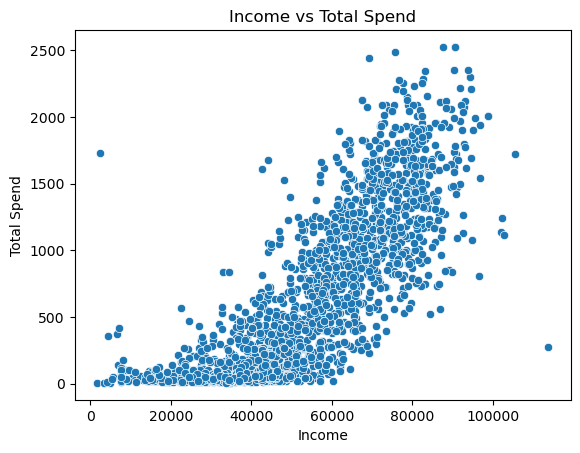

In [29]:
sns.scatterplot(x='Income', y='TotalSpend', data=df)
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()


In [30]:
correlation = df['Income'].corr(df['TotalSpend'])
print(f'Correlation between Income and Total Spend: {correlation}')

Correlation between Income and Total Spend: 0.8193535491669808


Hasil menunjukkan bahwa ada hubungan yang kuat dan positif antara pendapatan (Income) dan total pengeluaran (Total Spend) dan positif. Hal ini berarti ketika Income meningkat, Total Spend cenderung meningkat juga. Dengan kata lain, orang dengan pendapatan lebih tinggi cenderung berbelanja lebih banyak. Nilai korelasi berkisar antara -1 hingga 1. Nilai 0.819 mendekati 1, yang menunjukkan bahwa hubungan antara kedua variabel ini sangat kuat. Namun, itu tidak menunjukkan hubungan sebab-akibat, hanya bahwa kedua variabel ini sangat terkait. Secara umum, hasil menunjukkan bahwa Income memiliki pengaruh yang signifikan terhadap TotalSpend.

### Spending Demography
Untuk mengetahui bagaimanakah kategori umur dan income mempengaruhi pengeluaran.

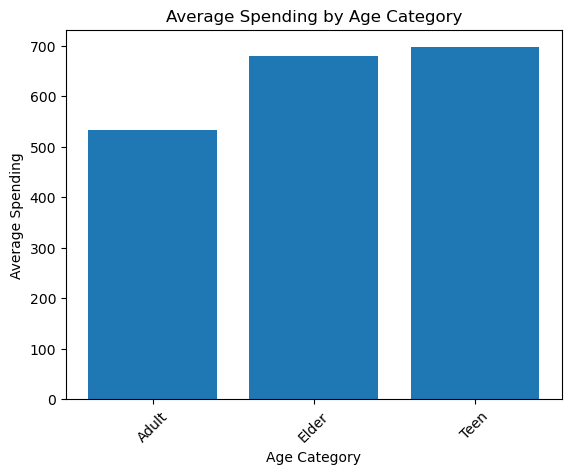

In [64]:
average_spend_by_age = df.groupby('Age_Category')['TotalSpend'].mean().reset_index()

plt.figure()
plt.bar(average_spend_by_age['Age_Category'], average_spend_by_age['TotalSpend'])
plt.xlabel('Age Category')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Category')
plt.xticks(rotation=45)
plt.show()

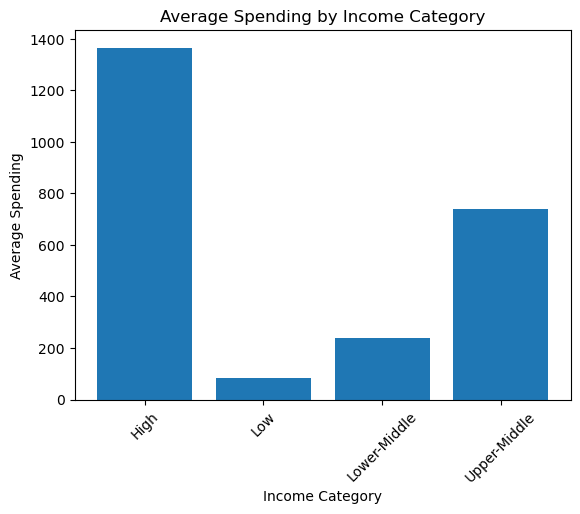

In [65]:
average_spend_by_inc = df.groupby('Income_Category')['TotalSpend'].mean().reset_index()

plt.figure()
plt.bar(average_spend_by_inc['Income_Category'], average_spend_by_inc['TotalSpend'])
plt.xlabel('Income Category')
plt.ylabel('Average Spending')
plt.title('Average Spending by Income Category')
plt.xticks(rotation=45)
plt.show()

In [32]:
from scipy.stats import f_oneway

age_categories = df['Age_Category'].unique()
groups = [df[df['Age_Category'] == category]['TotalSpend'] for category in age_categories]
f_stat, p_value = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_stat}, p-value: {p_value}')

ANOVA F-statistic: 16.832590328458323, p-value: 5.551711834863593e-08


Nilai F-statistic yang tinggi (16.8326) menunjukkan bahwa ada perbedaan yang signifikan dalam rata-rata TotalSpend antara Age_Category yang berbeda. Sedangkan, P-value sebesar 5.5517e-08 (0.000000055517) sangat kecil dan menunjukkan bahwa perbedaan antara rata-rata Total Spend dalam berbagai kategori umur adalah signifikan secara statistik. Dengan p-value yang sangat kecil, kita dapat menolak hipotesis nol (yang menyatakan bahwa tidak ada perbedaan antara grup) dan menerima hipotesis alternatif, yang menunjukkan bahwa memang ada perbedaan signifikan dalam pengeluaran total di berbagai kelompok umur. Kategori 'Teen' cenderung memiliki rata-rata pengeluaran yang lebih tinggi dibandingkan kategori umur yang lain. Diikuti dengan kategori 'Elder', dan kategori 'Adult' yang terendah. 

### Income_Category dan Product Preference
Untuk mengetahui apakah pelanggan dengan kategori pendapatan berbeda memiliki preferensi produk yang berbeda.

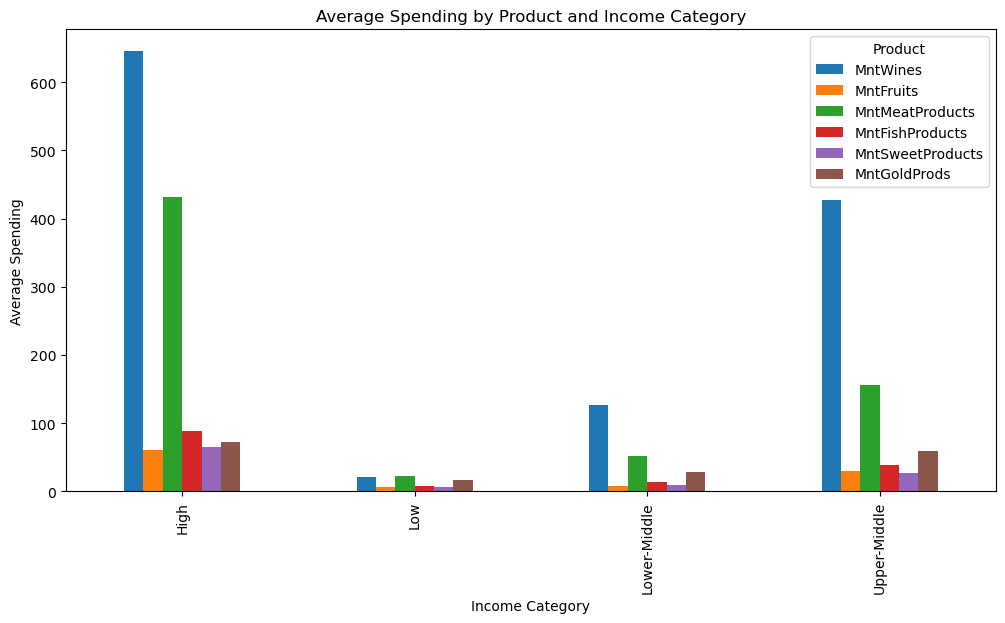

In [61]:
income_product_spending = df.groupby('Income_Category')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().reset_index()

income_product_spending.plot(x='Income_Category', kind='bar', figsize=(12,6))
plt.title('Average Spending by Product and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Spending')
plt.legend(title='Product')
plt.show()

In [34]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for product in product_columns:
    groups = [df[df['Income_Category'] == category][product] for category in df['Income_Category'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f'ANOVA for {product}: F-statistic: {f_stat}, p-value: {p_value}')

ANOVA for MntWines: F-statistic: 849.9887253840595, p-value: 0.0
ANOVA for MntFruits: F-statistic: 337.51300172882816, p-value: 1.3008336556050181e-180
ANOVA for MntMeatProducts: F-statistic: 867.8916729458908, p-value: 0.0
ANOVA for MntFishProducts: F-statistic: 379.8785896697477, p-value: 3.365880456299086e-199
ANOVA for MntSweetProducts: F-statistic: 369.60934300792474, p-value: 9.277733430529283e-195
ANOVA for MntGoldProds: F-statistic: 172.47531540540243, p-value: 1.5631471077690757e-100


Semua hasil ANOVA menunjukkan bahwa ada perbedaan yang signifikan dalam preferensi produk berdasarkan kategori pendapatan. Ini berarti bahwa orang dengan pendapatan yang berbeda memiliki kecenderungan yang berbeda dalam hal berapa banyak yang mereka belanjakan untuk berbagai jenis produk. Kelompok dengan pendapatan tinggi (High) lebih banyak membeli produk wine atau daging dibandingkan kelompok dengan pendapatan rendah (Low). Sedangkan kelompok dengan pendapatan rendah (Low) cenderung memiliki pengeluaran yang merata di semua jenis produk, walaupun dengan nilai yang lebih rendah. 

### Campaign Acceptance berdasarkan kategori umur dan pendapatan
- untuk mengetahui melihat pola penerimaan kampanye berdasarkan kategori umur dan pendapatan.

Pertama, kita dapat mencari tahu mengenai jumlah dan persentase pelanggan yang menerima kampanye. 

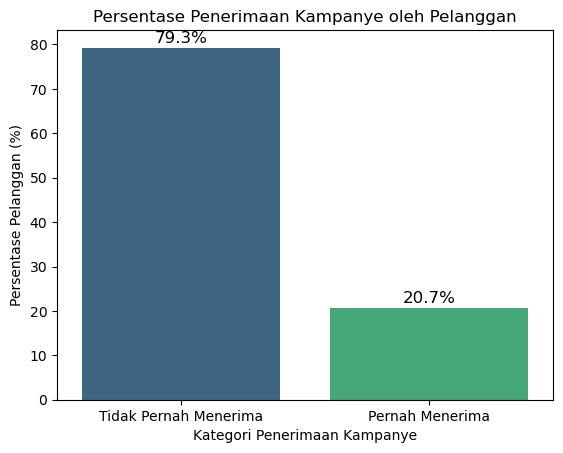

In [47]:
plt.figure()

category_counts = df['CmpCat'].value_counts(normalize=True) * 100
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.title('Persentase Penerimaan Kampanye oleh Pelanggan')
plt.xlabel('Kategori Penerimaan Kampanye')
plt.ylabel('Persentase Pelanggan (%)')

for i, v in enumerate(category_counts.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=12)

plt.show()

Berdasarkan grafik di atas, sebanyak 79% atau sebanyak 1767 pelanggan tidak menerima kampanye sama sekali, sedangkan hanya sebanyak 21% atau 462 pelanggan pernah menerima kampanye satu kali atau lebih. Untuk distribusi dari setiap kampanye dapat dilihat dari grafik sebagai berikut : 

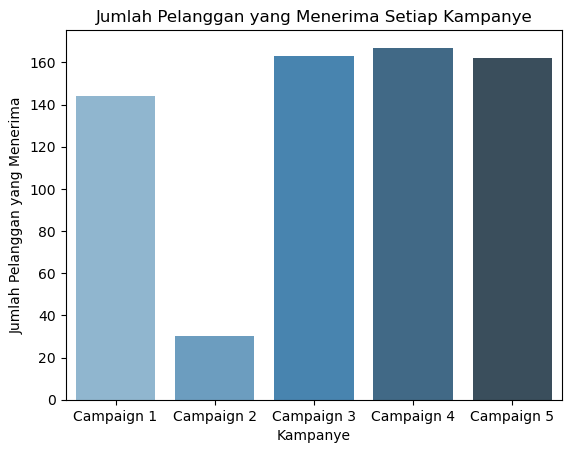

In [66]:
campaign_accepted = {
    'Campaign 1': df['AcceptedCmp1'].sum(),
    'Campaign 2': df['AcceptedCmp2'].sum(),
    'Campaign 3': df['AcceptedCmp3'].sum(),
    'Campaign 4': df['AcceptedCmp4'].sum(),
    'Campaign 5': df['AcceptedCmp5'].sum()
}

campaign_df = pd.DataFrame(list(campaign_accepted.items()), columns=['Campaign', 'Accepted'])

plt.figure()

sns.barplot(x='Campaign', y='Accepted', data=campaign_df, palette='Blues_d')

plt.title('Jumlah Pelanggan yang Menerima Setiap Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Pelanggan yang Menerima')

plt.show()

Berdasarkan grafik tersebut, kampanye yang paling banyak diterima adalah kampanye ketiga dan keempat, sedangkan kampanye kedua memiliki tingkat penerimaan terendah. 

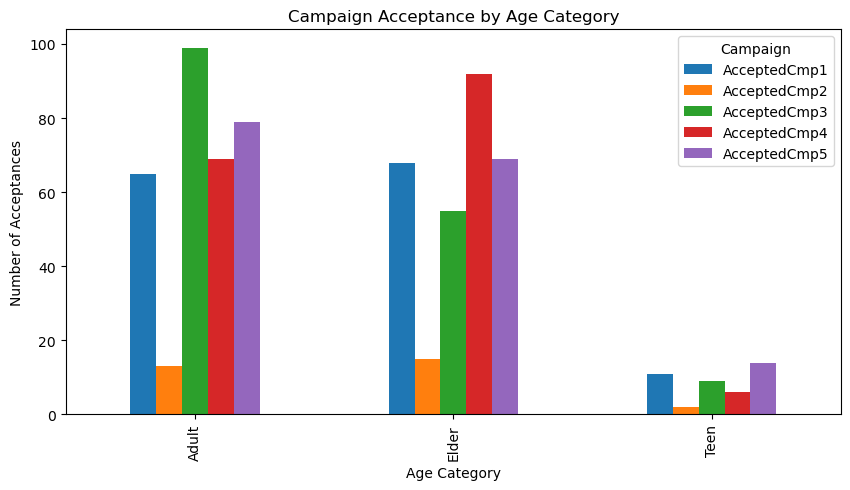

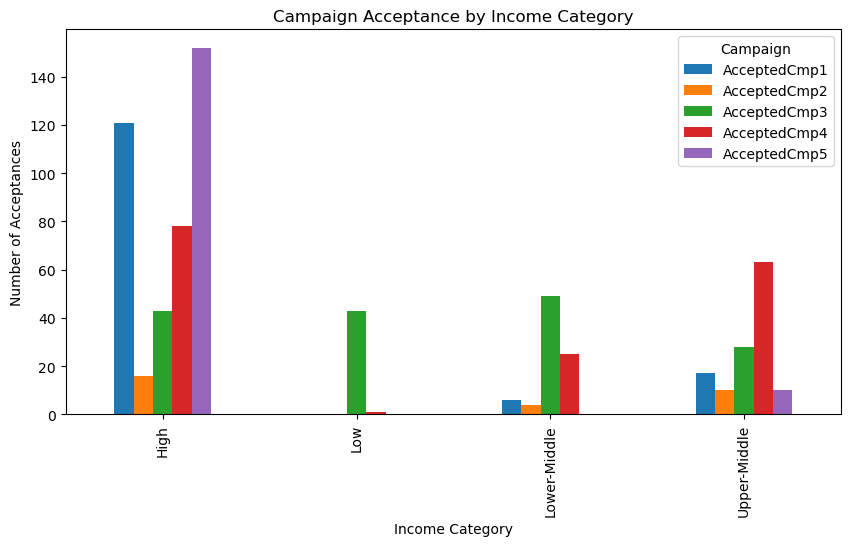

In [45]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Kategori umur
age_campaign_acceptance = df.groupby('Age_Category')[campaign_columns].sum()
age_campaign_acceptance.plot(kind='bar', figsize=(10, 5))
plt.title('Campaign Acceptance by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Acceptances')
plt.legend(title='Campaign')
plt.show()

# Kategori pendapatan
income_campaign_acceptance = df.groupby('Income_Category')[campaign_columns].sum()
income_campaign_acceptance.plot(kind='bar', figsize=(10, 5))
plt.title('Campaign Acceptance by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Acceptances')
plt.legend(title='Campaign')
plt.show()


Berdasarkan grafik kampanye dan kategori umur, dapat dilihat bahwa kategori 'Teen' yang paling rendah tingkat penerimaan kampanye dibandingkan segmen lainnya di seluruh kampanye, sedangkan kategori 'Adult' memiliki tingkat penerimaan yang tertinggi. Sedangkan berdasarkan kategori pendapatan, dapat dilihat bahwa kategori 'High' memiliki tingkat penerimaan kampanye paling tinggi dan 'Low' memiliki tingkat penerimaan kampanye yang paling rendah. Bahkan pada kategori 'Low' sama sekali tidak menerima kampanye promosi yang pertama, kedua, dan kelima. 

### Media Pembelian berdasarkan Kategori Pendapatan dan Kategori Umur

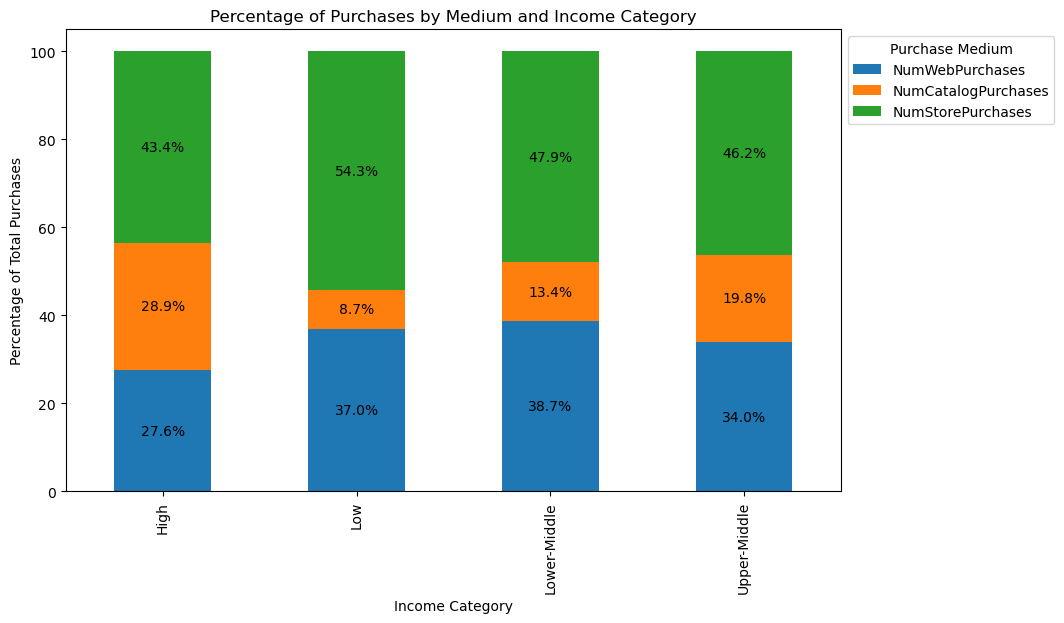

In [44]:
income_purchase_medium = df.groupby('Income_Category')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

income_purchase_medium_percentage = income_purchase_medium.div(income_purchase_medium.sum(axis=1), axis=0) * 100

ax = income_purchase_medium_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f%%')

plt.title('Percentage of Purchases by Medium and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Percentage of Total Purchases')

plt.legend(title='Purchase Medium', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik media pembelian berdasarkan pendapatan dapat dilihat bahwa seluruh kategori lebih banyak melakukan pembelian melalui toko secara langsung. Pelanggan dengan pendapatan tinggi (High) juga melakukan pembelian melalui web dan katalog dengan relatif seimbang. Hal ini menunjukkan bahwa pendapatan tinggi memiliki fleksibilitas dalam berbelanja dibandingkan pelanggan dengan pendapatan rendah (Low) yang lebih banyak melakukan pembelian di toko. Pembelian melalui web memiliki potensi yang besar terutama pada kalangan menengah. Sedangkan pembelian melalui katalog masih menjadi media pembelian yang paling rendah. 

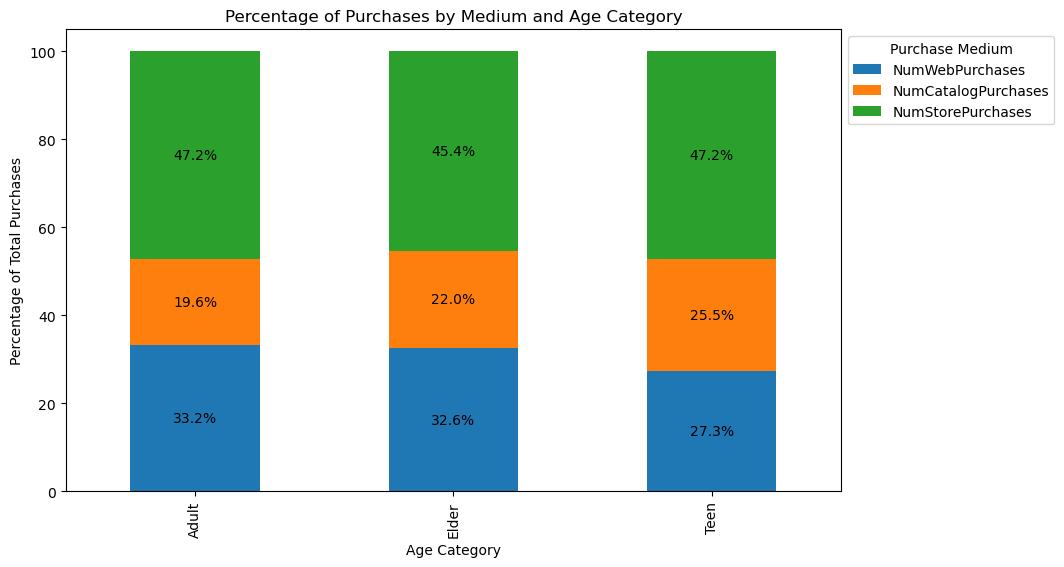

In [39]:
age_purchase_medium = df.groupby('Age_Category')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
age_purchase_medium_percentage = age_purchase_medium.div(age_purchase_medium.sum(axis=1), axis=0) * 100

ax = age_purchase_medium_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f%%')

plt.title('Percentage of Purchases by Medium and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Total Purchases')

plt.legend(title='Purchase Medium', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa pembelian di toko masih mendominasi di seluruh kelompok umur, kemudian diikuti dengan pembelian melalui web, dan yang paling rendah adalah pembelian melalui katalog. 

Berdasarkan analisis media pembelian berdasarkan kelompok umur maupun pendapatan, pembelian di toko secara langsung masih mendominasi. Kemudian, pembelian secara online juga mengikuti sehingga potensi pertumbuhan pembelian secara online masih sangat besar, terutama di kalangan Lower-Middle. Pembelian melalui katalog memiliki persentase yang relatif kecil, kemungkinan besar pelanggan lebih memilih kemudahan dalam berbelanja secara langsung ke toko atau melalui web. 

# Kesimpulan dan Rekomendasi

- Berdasarkan analisis yang dilakukan, terdapat beberapa kesimpulan yang dapat ditarik:  
    1. Terdapat korelasi yang kuat antara pendapatan dan pengeluaran, dimana semakin tinggi pendapatan, pelanggan cenderung berbelanja dengan lebih banyak pula. 
    2. Sebanyak 79% pelanggan tidak menerima kampanye promosi, sementara hanya 21% yang menerima kampanye. Kampanye promosi yang paling banyak diterima adalah kampanye ketiga dan keempat dan yang paling sedikit adalah kampanye kedua. 
    3. Kategori 'Teen' memiliki pengeluaran tertinggi, diikuti oleh 'Elder', dengan 'Adult' sebagai yang terendah.
    4. Kelompok pendapatan tinggi lebih sering membeli produk seperti wine dan daging, sementara kelompok pendapatan rendah cenderung mengeluarkan dana lebih merata di semua produk, meskipun dengan jumlah yang lebih kecil.
    5. Pembelian secara langsung di toko masih mendominasi media pembelian, diikuti dengan pembelian melalui web, sedangkan katalog sebagai media pembelian yang lebih rendah.
    
- Rekomendasi
    1. Mengembangkan strategi kampanye yang lebih relevan bagi kategori 'Teen' dan 'Low', yang saat ini menunjukkan kelompok yang menerima kampanye yang rendah.
    2. Meningkatkan pengalaman belanja online untuk menarik kelompok pendapatan menengah yang menunjukkan potensi besar untuk belanja melalui web, serta mengalihkan sumber daya dari katalog ke platform yang lebih diminati, seperti web dan toko, untuk meningkatkan efisiensi dan efektivitas.
    3. Mengembangkan strategi yang meningkatkan pengalaman berbelanja di toko fisik, mengingat toko masih menjadi media pembelian dominan di semua kelompok umur dan pendapatan.
    4. Menawarkan produk yang lebih terjangkau atau diskon khusus untuk pelanggan dengan pendapatan rendah untuk meningkatkan engagement.
